__Task Title:__
### Customer Churn Prediction & Recommendation Prototype

__Background Scenario:__

- A telecom company is experiencing high customer churn. They want to identify customers at risk of leaving and also build  a simple AI-powered recommendation system to suggest retention offers.
- You are given a customer dataset with demographics, usage patterns, and subscription details.

### Column Descriptions

`customerID` – Unique identifier assigned to each customer.

`gender` – Gender of the customer (Male/Female).

`SeniorCitizen` – Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).

`Partner` – Whether the customer has a spouse/partner (Yes/No).

`Dependents` – Whether the customer has dependents (children, family, etc.) (Yes/No).

`tenure` – Number of months the customer has stayed with the company.

`PhoneService` – Whether the customer has a phone service (Yes/No).

`MultipleLines` – Whether the customer has multiple phone lines (Yes/No/No phone service).

`InternetService` – Type of internet service: DSL, Fiber optic, or No.

`OnlineSecurity` – Whether the customer has online security add-on (Yes/No/No internet service).

`OnlineBackup` – Whether the customer has online backup service (Yes/No/No internet service).

`DeviceProtection` – Whether the customer has device protection service (Yes/No/No internet service).

`TechSupport` – Whether the customer has technical support service (Yes/No/No internet service).

`StreamingTV` – Whether the customer has streaming TV service (Yes/No/No internet service).

`StreamingMovies` – Whether the customer has streaming movies service (Yes/No/No internet service).

`Contract` – Customer’s contract type: Month-to-month, One year, or Two year.

`PaperlessBilling` – Whether the customer is enrolled in paperless billing (Yes/No).

`PaymentMethod` – Customer’s payment method (e.g., Electronic check, Mailed check, Bank transfer, Credit card).

`MonthlyCharges` – The amount charged to the customer monthly.

`TotalCharges` – The total amount charged to the customer over their tenure.

`Churn` – Target variable; indicates whether the customer left the company (Yes = churned, No = retained).

In [1]:
import pandas as pd
import numpy as np

### Reading the dataset

In [2]:
df = pd.read_csv('telecom_churn_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Male,0,No,No,50,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,No,Month-to-month,Yes,Bank transfer (automatic),37.46,1903.60,No
1,CUST0002,Female,0,No,Yes,46,Yes,Yes,Fiber optic,No,...,No internet service,Yes,No,No internet service,Two year,No,Bank transfer (automatic),108.06,4938.69,No
2,CUST0003,Male,0,No,Yes,3,Yes,No phone service,DSL,No,...,No internet service,Yes,No,No internet service,One year,No,Electronic check,90.22,301.97,No
3,CUST0004,Male,0,No,Yes,6,Yes,Yes,No,No internet service,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),106.58,683.53,No
4,CUST0005,Male,0,Yes,No,34,Yes,No,Fiber optic,Yes,...,No,Yes,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),57.11,1925.31,Yes


### Data cleaning & preprocessing

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

In [5]:
# Basic info
print(df.shape)
df.isnull().sum()

(1000, 21)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Ensure TotalCharges is numeric (common issue even if non-null)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan), errors='coerce')

# If any conversion created NaNs (rare here), handle them:
if df['TotalCharges'].isnull().sum() > 0:
    # if tenure==0 -> TotalCharges 0; else fill with median
    df.loc[(df['TotalCharges'].isna()) & (df['tenure']==0), 'TotalCharges'] = 0
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Standardize text in categorical columns (strip whitespace)
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

# Convert target to binary
df['Churn_flag'] = df['Churn'].map({'Yes':1,'No':0})
print("Churn distribution:\n", df['Churn'].value_counts(normalize=True))

Churn distribution:
 No     0.739
Yes    0.261
Name: Churn, dtype: float64


### EDA: plots and quick stats (univariate + bivariate)

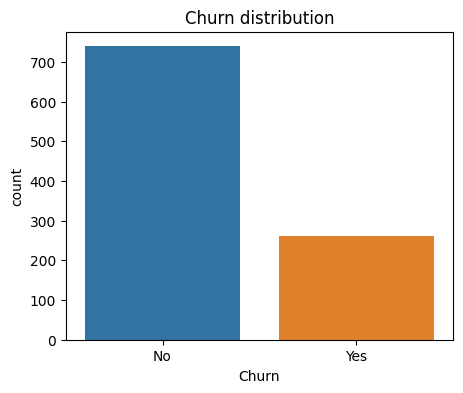

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline



# 1) Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn distribution")
plt.show()

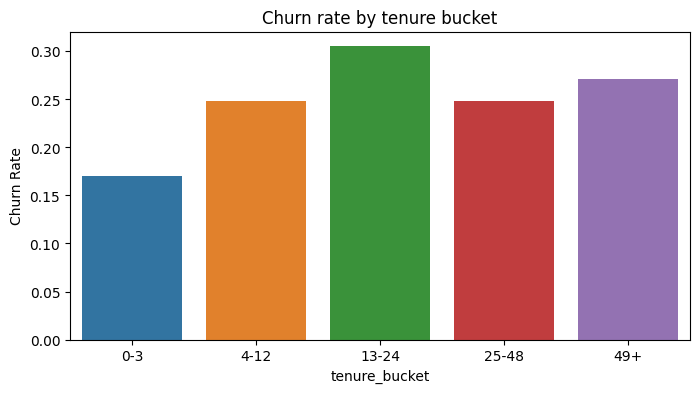

In [8]:
# 2) Tenure buckets vs churn
df['tenure_bucket'] = pd.cut(df['tenure'], bins=[-1,3,12,24,48,100], labels=['0-3','4-12','13-24','25-48','49+'])
plt.figure(figsize=(8,4))
tenure_churn = df.groupby('tenure_bucket')['Churn_flag'].mean().reset_index()
sns.barplot(data=tenure_churn, x='tenure_bucket', y='Churn_flag')
plt.ylabel("Churn Rate")
plt.title("Churn rate by tenure bucket")
plt.show()

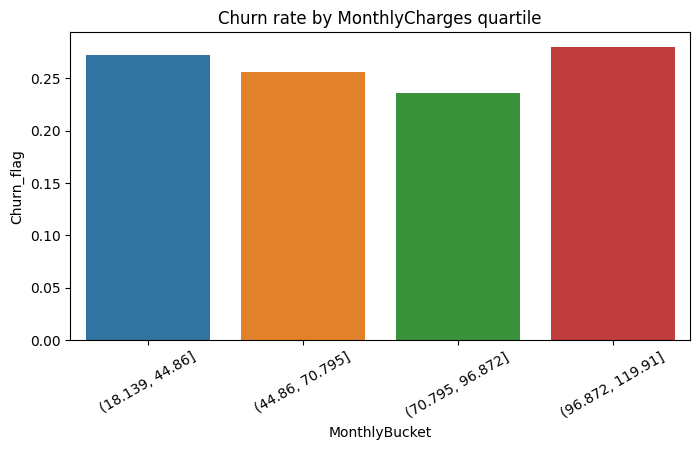

In [10]:
# 3) MonthlyCharges quartiles vs churn
df['MonthlyBucket'] = pd.qcut(df['MonthlyCharges'], q=4, duplicates='drop')
mc = df.groupby('MonthlyBucket')['Churn_flag'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='MonthlyBucket', y='Churn_flag', data=mc)
plt.xticks(rotation=30)
plt.title("Churn rate by MonthlyCharges quartile")
plt.show()

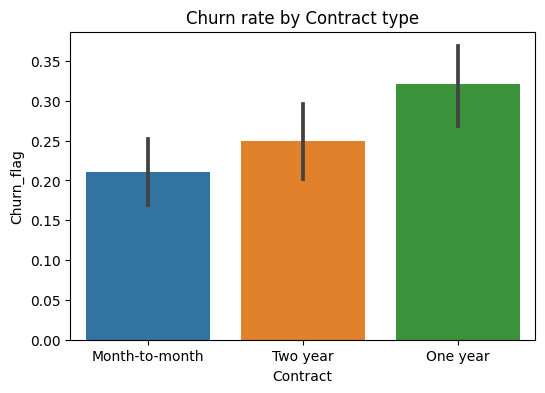

In [11]:
# 4) Contract type vs churn
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn_flag', data=df)
plt.title("Churn rate by Contract type")
plt.show()

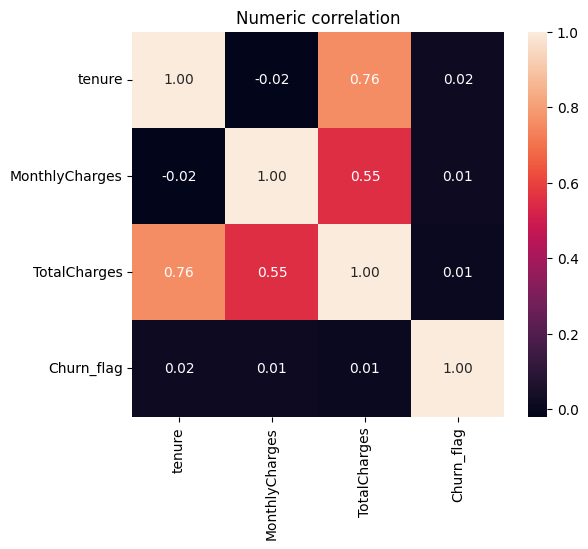

In [12]:
# 5) Numeric correlations
plt.figure(figsize=(6,5))
num_cols = ['tenure','MonthlyCharges','TotalCharges','Churn_flag']
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title("Numeric correlation")
plt.show()


In [13]:
# avg_monthly_charge (avoid division by zero)
df['avg_monthly_charge'] = df['TotalCharges'] / (df['tenure'] + 1)

# service count proxy (count how many services not 'No' or 'No internet service')
service_cols = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies']
def count_services(row):
    cnt = 0
    for c in service_cols:
        v = row.get(c, 'No')
        if isinstance(v, str) and v.lower() not in ('no','no phone service','no internet service'):
            cnt += 1
    return cnt

df['services_count'] = df.apply(count_services, axis=1)

# Useful feature list (adjust as needed)
features = ['tenure','MonthlyCharges','TotalCharges','avg_monthly_charge','services_count','Contract','PaymentMethod','InternetService','SeniorCitizen','PaperlessBilling']
target = 'Churn_flag'


### Train/test split & preprocessing pipeline

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

X = df[features].copy()
y = df[target].copy()

num_features = ['tenure','MonthlyCharges','TotalCharges','avg_monthly_charge','services_count']
cat_features = ['Contract','PaymentMethod','InternetService','SeniorCitizen','PaperlessBilling']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Model training: Logistic Regression & Random Forest

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Pipelines
pipe_lr = Pipeline(steps=[('preproc', preprocessor),
                          ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))])

pipe_rf = Pipeline(steps=[('preproc', preprocessor),
                          ('clf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))])

# Fit
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'avg_monthly_charge',
                                                   'services_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'SeniorCitizen',
                                                   'PaperlessBilling'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

### Evaluation helper + evaluate both models

=== Logistic Regression ===
Accuracy: 0.5850
Precision: 0.3218
Recall: 0.5385
F1-score: 0.4029
ROC-AUC: 0.5758

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       148
           1       0.32      0.54      0.40        52

    accuracy                           0.58       200
   macro avg       0.55      0.57      0.54       200
weighted avg       0.67      0.58      0.61       200



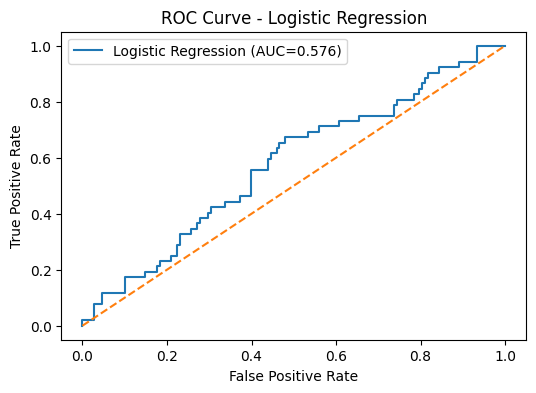

=== Random Forest ===
Accuracy: 0.7150
Precision: 0.1429
Recall: 0.0192
F1-score: 0.0339
ROC-AUC: 0.5785

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       148
           1       0.14      0.02      0.03        52

    accuracy                           0.71       200
   macro avg       0.44      0.49      0.43       200
weighted avg       0.58      0.71      0.63       200



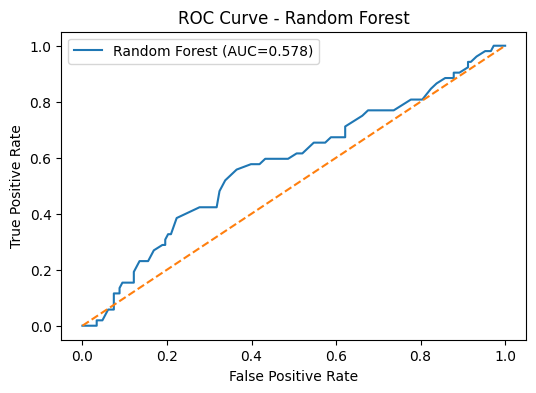

In [16]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, classification_report)


def evaluate_model(pipe, X_test, y_test, model_name="Model"):
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"=== {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

evaluate_model(pipe_lr, X_test, y_test, "Logistic Regression")
evaluate_model(pipe_rf, X_test, y_test, "Random Forest")


### Feature importance (Random Forest)

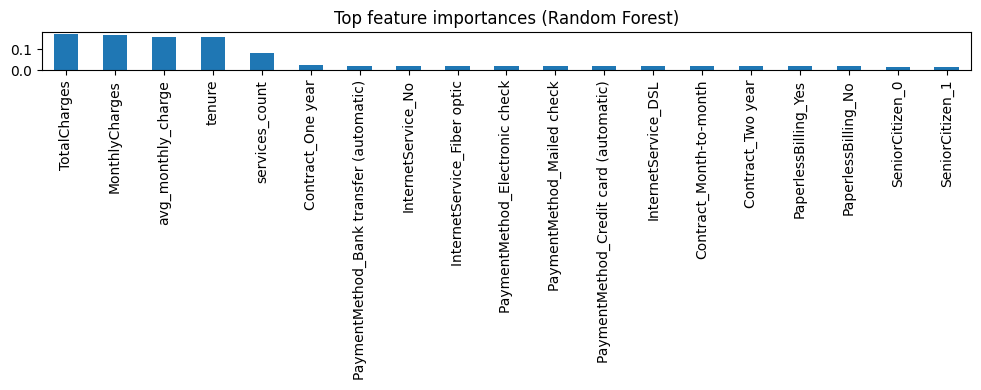

In [17]:
# extract OHE feature names
ohe = pipe_rf.named_steps['preproc'].named_transformers_['cat'].named_steps['onehot']
cat_names = ohe.get_feature_names_out(cat_features)
feature_names = num_features + list(cat_names)

importances = pipe_rf.named_steps['clf'].feature_importances_
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
fi.plot(kind='bar')
plt.title("Top feature importances (Random Forest)")
plt.tight_layout()
plt.show()

### Recommendation prototype (rule-based) + test cases

In [18]:
# Rule based recommender
def recommend_offer(customer_row):
    """
    customer_row: dict-like or pandas Series with keys:
      MonthlyCharges, avg_monthly_charge, services_count, tenure, InternetService, Churn_flag (optional), churn_prob (optional)
    Returns: recommendation string
    """
    try:
        monthly = float(customer_row.get('MonthlyCharges', 0))
        tenure = float(customer_row.get('tenure', 0))
        avg_monthly = float(customer_row.get('avg_monthly_charge', monthly))
        services_count = int(customer_row.get('services_count', 0))
        churn_prob = customer_row.get('churn_prob', None)
    except Exception:
        return "Insufficient data for recommendation"

    # 1) Heavy-data user -> upgrade
    if (services_count >= 3) and (customer_row.get('InternetService','No').lower() != 'no'):
        return "Upgrade to Unlimited Data Plan"

    # 2) Long tenure but likely to churn -> loyalty discount
    if churn_prob is not None and churn_prob > 0.6 and tenure >= 24:
        return "Offer 10% loyalty discount"
    if tenure >= 36 and customer_row.get('Churn_flag',0) == 1:
        return "Offer 10% loyalty discount"

    # 3) Low usage -> switch to basic plan
    # using dataset quartile as threshold
    threshold = df['MonthlyCharges'].quantile(0.25)
    if monthly < threshold or services_count <= 1:
        return "Switch to basic plan to save cost"

    # 4) Default
    return "Offer free 1-month add-on (e.g., free OTT) or personalized discount"

# Test cases
test1 = {'MonthlyCharges': 120, 'avg_monthly_charge':120, 'services_count':4, 'tenure':12, 'InternetService':'Fiber optic', 'Churn_flag':1}
test2 = {'MonthlyCharges': 50, 'avg_monthly_charge':50, 'services_count':1, 'tenure':2, 'InternetService':'DSL', 'Churn_flag':0}
test3 = {'MonthlyCharges': 80, 'avg_monthly_charge':80, 'services_count':2, 'tenure':48, 'InternetService':'DSL', 'Churn_flag':1, 'churn_prob':0.72}

print("Test1 =>", recommend_offer(test1))
print("Test2 =>", recommend_offer(test2))
print("Test3 =>", recommend_offer(test3))


Test1 => Upgrade to Unlimited Data Plan
Test2 => Switch to basic plan to save cost
Test3 => Offer 10% loyalty discount


In [19]:
import joblib

joblib.dump(pipe_rf, "rf_churn_model.pkl")
print("Saved model to rf_churn_model.pkl")

Saved model to rf_churn_model.pkl
